**1. Planificación de la Migración**


*   Revisión de los Requisitos
Verificar que Google Cloud SQL admita la versión de MySQL que se está utilizando.
Evaluar los tamaños de las bases de datos y calcular el espacio necesario en Cloud SQL.
*   Configuración Inicial
Habilitar la API de Cloud SQL en Google Cloud Console.
Configurar una instancia de Cloud SQL con MySQL. Asegurarse de seleccionar los recursos adecuados (CPU, RAM y almacenamiento).
Definir la red para permitir conexiones seguras desde la fuente (on-premise o en la nube).


*   Plan de Interrupciones
Definir un periodo de mantenimiento para minimizar el impacto en los usuarios si es necesario detener el servicio.
Preparar un plan de rollback por si ocurre algún problema.


**2. Exportación de la Base de Datos desde MySQL**


*   Abrir  MySQL: Usar una herramienta gráfica como MySQL Workbench.
*   Exportación:


1.   ir a Data Export en el menú principal.
2.   Seleccionar la base de datos y las tablas a exportar.
3.   Marcar las opciones para exportar esquema y datos.
4.   Elegir la ubicación donde se guardará el archivo .sql y dar en Start Export para posterior mente subirlo a un bucket.




**3. Subir el Archivo a Google Cloud Storage**


*   Acceder a Google Cloud Console:
En el menú, seleccionar Storage > Buckets.

*   Crear un Bucket:
Asignar un nombre único y selecciona una región cercana.

*   Subir el Archivo SQL:
Subir archivos y seleccionar el archivo .sql exportado.



**4. Importar la Base de Datos a Cloud SQL**


* En Google Cloud Console:
ir a SQL > seleccionar la instancia que se creó.
clic en la pestaña Importar.
*   Configurar la Importación:
Seleccionar el archivo SQL desde el bucket de Google Cloud Storage.
Especificar el nombre de la base de datos en la instancia de Cloud SQL donde se quiere importar los datos.
clic en Iniciar importación.
* Verificación Automática:
Google verifica automáticamente la integridad de los datos durante la importación.



In [15]:
import mysql.connector
from mysql.connector import Error
import os

def export_database():
    try:
       
        connection = mysql.connector.connect(
            host='127.0.0.1',  
            user='root',      
            password='04Alejito+',  
            database='datos'   
        )
        
        if connection.is_connected():
            print("Conexión exitosa a la base de datos.")
            
           
            dump_file = r"C:\Users\Alejandro\Downloads"
            os.system(f"mysqldump -h 127.0.0.1 -P 3306 -u root -p'04Alejito+' datos > {dump_file}")
            
            if os.path.exists(dump_file):
                print(f"Exportación completa. Archivo generado: {dump_file}")
            else:
                print("Error al generar el archivo de exportación.")
            
    except Error as e:
        print("Error al conectar con MySQL:", e)
    
    finally:
        if connection.is_connected():
            connection.close()
            print("Conexión cerrada.")

export_database()



Conexión exitosa a la base de datos.
Exportación completa. Archivo generado: C:\Users\Alejandro\Downloads
Conexión cerrada.


Teniendo Ya este código e importanto los datos a .sql ya podemos subir este archivo a un bucket de google e importarlo a cloud SQL

O sin código sencillamento desde Workbench de Mysql podiamos exportar la base cómo lo hablé al principio y subir el archivo resultande el Schema a GCS

# Optimización en la Nube
Para AWS, investigué al no tener total conocimiento.
## AWS

### 1. Recomendaciones para optimizar costos
En un entorno típico con instancias EC2, buckets S3 y RDS, se pueden aplicar las siguientes estrategias para reducir costos sin afectar la funcionalidad:

#### **Instancias EC2**
- **Escalado automático:** Configurar grupos de escalado automático para ajustar dinámicamente el número de instancias según la carga de trabajo.
- **Reserva de instancias:** Utilizar **Reserved Instances** o **Savings Plans** para cargas constantes y predecibles. Para tareas no críticas, emplear **Spot Instances**, que son hasta un 90% más económicas.
- **Cambio a instancias más económicas:** Revisar las instancias actuales y reducir su tamaño si están sobredimensionadas.
- **Apagar instancias inactivas:** Automatizar el apagado de instancias que no estén en uso durante horarios no laborales.

#### **Buckets S3**
- **Clases de almacenamiento:** Usar **S3 Standard** para datos de acceso frecuente y mover datos a **S3 Glacier** o **S3 Intelligent-Tiering** para almacenamiento a largo plazo o acceso infrecuente.
- **Versionado y ciclo de vida:** Configurar reglas para eliminar versiones antiguas de archivos y automatizar el archivado o eliminación de datos obsoletos.

#### **RDS (Relational Database Service)**
- **Reserva de instancias:** Aplicar reservas para bases de datos con uso constante.
- **Escalabilidad:** Reducir el tamaño de la instancia si es necesario o usar particionamiento y réplicas de lectura para escalar horizontalmente.
- **Optimización del almacenamiento:** Usar almacenamiento basado en IOPS únicamente para casos que lo requieran.
- **Gestión de backups:** Automatizar la creación de backups y eliminar snapshots antiguos.

---

### 2. Ajustes de recursos y configuraciones para mejorar la eficiencia
- **Monitoreo constante:** Implementar **AWS CloudWatch** para supervisar el uso de recursos y recibir alertas ante picos de carga.
- **Optimización de redes:** Usar **Amazon CloudFront** como CDN para reducir costos de transferencia de datos y mejorar la latencia.
- **Consolidación de cuentas:** Centralizar la facturación con **AWS Organizations** y aplicar políticas globales de optimización.

---

## GCP

### 1. Recomendaciones para optimizar costos
En un entorno con Compute Engine, Cloud Storage y Cloud SQL, con las siguientes estrategias podriamos optimizar costos:

#### **Compute Engine**
- **Rebajas automáticas:** Aprovechar los **Sustained Use Discounts**, que aplican automáticamente cuando se usan instancias durante largos periodos.
- **Preemptible VMs:** Usar máquinas preemptibles para tareas no críticas, ya que son más económicas.
- **Escalado automático:** Configurar el autoscaling para ajustar la cantidad de instancias según la demanda.
- **Máquinas personalizadas:** Crear configuraciones personalizadas de CPU y memoria para evitar el sobredimensionamiento.

#### **Cloud Storage**
- **Clases de almacenamiento:** Elegir **Nearline** o **Coldline** para datos con acceso esporádico y **Archive** para almacenamiento a largo plazo.
- **Ciclo de vida:** Configurar políticas para migrar o eliminar datos automáticamente según su antigüedad.

#### **Cloud SQL**
- **Optimización de instancias:** Ajustar el tamaño de las instancias según el uso real.
- **Réplicas de lectura:** Configurar réplicas para manejar cargas de solo lectura.
- **Gestión de backups:** Automatizar los backups y eliminar aquellos que ya no son necesarios.






### 2. Comparación entre AWS y GCP

| **Aspecto**              | **AWS**                                   | **GCP**                              |
|--------------------------|------------------------------------------|--------------------------------------|
| **Costos**               | Ofrece más opciones avanzadas de optimización (ej. Spot Instances), pero requiere configuración manual. | Aplicación automática de descuentos (Sustained Use Discounts). |
| **Facilidad de uso**     | Interfaz más compleja, con una curva de aprendizaje pronunciada. | Interfaz más intuitiva, ideal para nuevos usuarios. |
| **Ecosistema**           | Más robusto, ideal para grandes empresas con múltiples necesidades. | Más simple, adecuado para empresas pequeñas o con cargas específicas. |
| **Flexibilidad**         | Gran personalización con múltiples herramientas. | Simplificación con menos opciones avanzadas. |

# Preguntas Teóricas

## Diferencias clave entre IAM en AWS y GCP

### **AWS IAM (Identity and Access Management):**
- Es un sistema que controla quién puede hacer qué en los recursos de AWS.
- Usa **políticas** (documentos con reglas) para definir permisos. Por ejemplo, puedes dar acceso solo a ciertos buckets de S3 o instancias EC2.
- Permite crear **roles** para que servicios y aplicaciones accedan a los recursos sin usar contraseñas.
- Puedes establecer **condiciones específicas**, como acceso desde ciertas IPs o regiones.

### **GCP IAM (Identity and Access Management):**
- También controla quién tiene acceso a los recursos, pero es más simple de usar.
- Usa **roles predefinidos** (por ejemplo, “Lector” o “Editor”) y también puedes crear roles personalizados.
- Los permisos se heredan automáticamente en una estructura jerárquica: Organización > Proyecto > Recurso. Esto hace que sea más fácil manejar los accesos.
- Puedes usar **condiciones avanzadas**, como acceso basado en atributos de la solicitud o del recurso.

### **Comparación básica:**
| **Aspecto**              | **AWS IAM**                        | **GCP IAM**                          |
|--------------------------|------------------------------------|--------------------------------------|
| **Cómo funciona**        | Basado en políticas               | Basado en roles                     |
| **Jerarquía**            | No hereda entre recursos          | Herencia automática                 |
| **Facilidad de uso**     | Más difícil al principio          | Más simple y amigable               |

---

## Alta disponibilidad

### **¿Qué es la alta disponibilidad?**
Es una forma de asegurarte de que tu aplicación y base de datos siempre estén funcionando, incluso si ocurre un problema (como un fallo del servidor).

### **Cómo garantizarla en AWS:**
1. **Bases de datos altamente disponibles:**
   - Usar **Amazon RDS con Multi-AZ**, que crea copias de tu base de datos en diferentes zonas de disponibilidad. Si una zona falla, AWS usa automáticamente la copia.
   
2. **Balanceo de carga:**
   - Usar un **Elastic Load Balancer** para distribuir el tráfico entre múltiples servidores. Esto evita que un solo servidor sobrecargado cause problemas.

3. **Copias de seguridad (backups):**
   - Configurar backups automáticos para restaurar la base de datos en caso de fallos.

4. **Escalado automático:**
   - Configurar **Auto Scaling** para agregar más servidores cuando haya más usuarios o tráfico, y reducirlos cuando no se necesiten.

---

### **Cómo garantizarla en GCP:**
1. **Bases de datos con alta disponibilidad:**
   - Habilitar la opción de alta disponibilidad en **Cloud SQL**, que crea una copia de tu base de datos en otra zona y realiza failover automático.

2. **Balanceo de carga:**
   - Usar **Google Cloud Load Balancer** para distribuir el tráfico entre múltiples servidores y mantener todo funcionando.

3. **Copias de seguridad (backups):**
   - Configurar backups automáticos en Cloud SQL para restaurar datos fácilmente si algo falla.

4. **Uso de servicios avanzados:**
   - Usar **Cloud Spanner** para bases de datos distribuidas globalmente. Es ideal si necesitas que tu aplicación funcione en todo el mundo con alta disponibilidad.

---

### **Comparación básica:**
| **Aspecto**              | **AWS**                               | **GCP**                              |
|--------------------------|---------------------------------------|--------------------------------------|
| **Base de datos**        | RDS con Multi-AZ                     | Cloud SQL con alta disponibilidad   |
| **Balanceo de carga**    | Elastic Load Balancer                | Google Cloud Load Balancer          |
| **Backups**              | Snapshots automáticos                | Backups automáticos                 |
| **Opciones avanzadas**   | DynamoDB Global Tables               | Cloud Spanner                       |


# Parte 2: Python (Desarrollo y scrip ng) 


Proporciona un script que limpie un archivo CSV de ejemplo (con datos 
simulados), elimine duplicados y realice agregaciones básicas como suma y 
promedio.

In [17]:
import pandas as pd
from faker import Faker
import random

# Generar datos simulados
def generar_datos_simulados(nombre_archivo, filas=100):
    fake = Faker()
    Faker.seed(42)
    random.seed(42)

    # datos ficticios
    data = {
        "ID": [i for i in range(1, filas + 1)],
        "Nombre": [fake.name() for _ in range(filas)],
        "Edad": [random.randint(18, 80) for _ in range(filas)],
        "Salario": [round(random.uniform(20000, 100000), 2) for _ in range(filas)],
        "Ciudad": [fake.city() for _ in range(filas)],
    }

    
    df = pd.DataFrame(data)
    df.to_csv(nombre_archivo, index=False)
    print(f"Archivo generado: {nombre_archivo}")

# Procesar datos: limpieza, eliminación de duplicados y agregaciones
def procesar_csv(nombre_archivo):
    try:
        
        df = pd.read_csv(nombre_archivo)
        duplicados_iniciales = df.duplicated().sum()
        df = df.drop_duplicates()
        duplicados_finales = duplicados_iniciales
        suma_columnas = df.select_dtypes(include="number").sum()
        promedio_columnas = df.select_dtypes(include="number").mean()
        print(f"Duplicados eliminados: {duplicados_finales}")
        print("\nSuma por columnas numéricas:")
        print(suma_columnas)
        print("\nPromedio por columnas numéricas:")
        print(promedio_columnas)

    except Exception as e:
        print(f"Error procesando el archivo: {e}")

# Generar datos simulados
archivo_csv = "datos_simulados.csv"
generar_datos_simulados(archivo_csv, filas=100)

# Procesar el archivo generado
procesar_csv(archivo_csv)


Archivo generado: datos_simulados.csv
Duplicados eliminados: 0

Suma por columnas numéricas:
ID            5050.00
Edad          4573.00
Salario    6333588.99
dtype: float64

Promedio por columnas numéricas:
ID            50.5000
Edad          45.7300
Salario    63335.8899
dtype: float64


# Script para Generación y Procesamiento de Datos Simulados en CSV

## Descripción General
Este script en Python realiza dos tareas principales:
1. **Generación de datos simulados**: Crea un archivo CSV con datos ficticios, como nombres, edades, salarios y ciudades, utilizando la biblioteca `Faker`.
2. **Procesamiento del CSV**: Realiza tareas de limpieza y análisis básico sobre los datos del archivo, incluyendo:
   - Eliminación de duplicados.
   - Cálculo de suma y promedio de columnas numéricas.

---

Continuamos con la parte 2 del eejercicio.

In [18]:

def generar_csv_grande(nombre_archivo, filas=1000000):
    fake = Faker()
    Faker.seed(42)
    random.seed(42)
    
    chunk_size = 100000  # Se utiliza un termino llamado chunk para poder procesar los datos de manera distribuída.
    with open(nombre_archivo, 'w') as file:
        
        file.write("ID,Nombre,Edad,Salario,Ciudad\n")
        
        for start in range(0, filas, chunk_size):
            data = {
                "ID": range(start + 1, start + chunk_size + 1),
                "Nombre": [fake.name() for _ in range(chunk_size)],
                "Edad": [random.randint(18, 80) for _ in range(chunk_size)],
                "Salario": [round(random.uniform(20000, 100000), 2) for _ in range(chunk_size)],
                "Ciudad": [fake.city() for _ in range(chunk_size)],
            }
            
            pd.DataFrame(data).to_csv(file, header=False, index=False)

    print(f"Archivo CSV grande generado: {nombre_archivo}")

# Procesar el CSV generado en chunks
def procesar_csv_grande(nombre_archivo, chunk_size=100000):
    duplicados_totales = 0
    suma_total = None
    promedio_total = None
    
    for chunk in pd.read_csv(nombre_archivo, chunksize=chunk_size):
        duplicados_chunk = chunk.duplicated().sum()
        duplicados_totales += duplicados_chunk
        chunk = chunk.drop_duplicates()
        suma_chunk = chunk.select_dtypes(include="number").sum()
        promedio_chunk = chunk.select_dtypes(include="number").mean()
        if suma_total is None:
            suma_total = suma_chunk
            promedio_total = promedio_chunk
        else:
            suma_total += suma_chunk
            promedio_total += promedio_chunk / 2  

   
    print(f"Duplicados eliminados: {duplicados_totales}")
    print("\nSuma total por columnas numéricas:")
    print(suma_total)
    print("\nPromedio total por columnas numéricas:")
    print(promedio_total)

# Generar CSV grande 
archivo_csv_grande = "datos_grandes.csv"
generar_csv_grande(archivo_csv_grande, filas=1000000)

# Procesar el CSV grande
procesar_csv_grande(archivo_csv_grande)


Archivo CSV grande generado: datos_grandes.csv
Duplicados eliminados: 0

Suma total por columnas numéricas:
ID         5.000005e+11
Edad       4.900778e+07
Salario    5.999265e+10
dtype: float64

Promedio total por columnas numéricas:
ID         2.525003e+06
Edad       2.695393e+02
Salario    3.299642e+05
dtype: float64


# Script para Generar y Procesar Datos Simulados con Grandes Cantidades de Información

## ¿Qué hace este script?

Básicamente, este script tiene dos partes importantes:

1. **Generar un CSV con datos simulados**: Crea un archivo bastante grande (1 millón de filas, por ejemplo) lleno de datos falsos como nombres, edades, salarios y ciudades. Usamos una librería llamada `Faker` para que todo sea aleatorio y parezca realista.

2. **Procesar ese CSV**: Luego, tomamos ese archivo y lo analizamos. El script elimina duplicados y calcula cosas básicas como la suma y el promedio de las columnas numéricas. Además, está diseñado para manejar grandes volúmenes de datos sin problemas por el maejo de chunks lo que nos permite manejar los datos por partes definidas, y no en un solo momento para que no se consuma el total de la memoria, otra de las maneras en las que hubiera podido optimizar este c´digo es con dask, comprimiendo los csv en archivos .parquet y que no se maneje todo en memoria si no hasta el momento del calculo final o .compute()



In [19]:
import boto3
import os

# Crear un bucket en AWS S3
def crear_bucket_s3(bucket_name, region="us-east-1"):
    try:
        # Cliente de S3
        s3_client = boto3.client("s3", region_name=region)

        # Crear el bucket
        s3_client.create_bucket(
            Bucket=bucket_name,
            CreateBucketConfiguration={"LocationConstraint": region},
        )
        print(f"Bucket '{bucket_name}' creado en AWS S3.")

    except Exception as e:
        print(f"Error creando bucket en S3: {e}")

# Subir archivo a S3
def cargar_archivo_s3(bucket_name, archivo_local, archivo_remoto):
    try:
        s3_client = boto3.client("s3")
        s3_client.upload_file(archivo_local, bucket_name, archivo_remoto)
        print(f"Archivo '{archivo_local}' cargado como '{archivo_remoto}' en el bucket '{bucket_name}'.")
    except Exception as e:
        print(f"Error cargando archivo a S3: {e}")

# Simulación del proceso en AWS S3
def main():
    # Parámetros
    bucket_name = "mi-bucket-s3-prueba"
    archivo_local = "archivo_prueba.txt"
    archivo_remoto = "carga_prueba.txt"

    # Crear archivo local para cargar
    with open(archivo_local, "w") as f:
        f.write("Este es un archivo de prueba para AWS S3.")

    # AWS S3
    print("\n--- AWS S3 ---")
    crear_bucket_s3(bucket_name)
    cargar_archivo_s3(bucket_name, archivo_local, archivo_remoto)

    # Limpiar archivo local
    os.remove(archivo_local)

if __name__ == "__main__":
    main()



--- AWS S3 ---
Error creando bucket en S3: Unable to locate credentials
Error cargando archivo a S3: Unable to locate credentials


In [20]:
from google.cloud import storage
import os

# Crear un bucket en GCP Cloud Storage
def crear_bucket_gcp(bucket_name):
    try:
        # Cliente de Google Cloud Storage
        storage_client = storage.Client()

        # Crear el bucket
        bucket = storage_client.create_bucket(bucket_name)
        print(f"Bucket '{bucket_name}' creado en GCP Cloud Storage.")

    except Exception as e:
        print(f"Error creando bucket en GCP: {e}")

# Subir archivo a GCP Cloud Storage
def cargar_archivo_gcp(bucket_name, archivo_local, archivo_remoto):
    try:
        storage_client = storage.Client()
        bucket = storage_client.bucket(bucket_name)
        blob = bucket.blob(archivo_remoto)

        # Subir archivo
        blob.upload_from_filename(archivo_local)
        print(f"Archivo '{archivo_local}' cargado como '{archivo_remoto}' en el bucket '{bucket_name}'.")
    except Exception as e:
        print(f"Error cargando archivo a GCP: {e}")

# Simulación del proceso en GCP
def main():
    # Parámetros
    bucket_name = "mi-bucket-gcp-prueba"
    archivo_local = "archivo_prueba.txt"
    archivo_remoto = "carga_prueba.txt"

    # Crear archivo local para cargar
    with open(archivo_local, "w") as f:
        f.write("Este es un archivo de prueba para GCP Cloud Storage.")

    # GCP Cloud Storage
    print("\n--- GCP Cloud Storage ---")
    crear_bucket_gcp(bucket_name)
    cargar_archivo_gcp(bucket_name, archivo_local, archivo_remoto)

    # Limpiar archivo local
    os.remove(archivo_local)

if __name__ == "__main__":
    main()



--- GCP Cloud Storage ---
Error creando bucket en GCP: Your default credentials were not found. To set up Application Default Credentials, see https://cloud.google.com/docs/authentication/external/set-up-adc for more information.
Error cargando archivo a GCP: Your default credentials were not found. To set up Application Default Credentials, see https://cloud.google.com/docs/authentication/external/set-up-adc for more information.


Para este caso no tengo las credenciales de AWS y GCP, sin embargo que con este código podríamos crear buckets tanto en GCS Como en AWS S3 en los datalakes para subir allí nuestros archivos CSV o txt


# Optimización de Memoria en Python

Trabajar con grandes volúmenes de datos en Python puede ser un desafío si no se gestiona la memoria de manera eficiente. A continuación, se presentan estrategias teóricas para optimizar el uso de memoria.

---

## 1. Procesar Datos en Fragmentos (Chunks)
En lugar de cargar archivos grandes completamente en memoria, es más eficiente procesarlos en fragmentos más pequeños. Esto reduce la carga en la RAM y permite trabajar con archivos de gran tamaño.

---

## 2. Usar Tipos de Datos Eficientes
Optimizar los tipos de datos puede ahorrar memoria significativamente:
- Reducir enteros y flotantes a tamaños más pequeños, como `int32` y `float32`, en lugar de los predeterminados `int64` y `float64`.
- Usar tipos categóricos para columnas con valores repetidos, como nombres o categorías.

---

## 3. Eliminar Objetos Innecesarios
Liberar objetos que ya no se usan ayuda a liberar memoria de manera anticipada. Esto puede complementarse forzando la recolección de basura para liberar memoria de inmediato.

---

## 4. Usar Generadores en Lugar de Listas
Los generadores producen elementos uno por uno, lo que evita cargar toda la colección en memoria al mismo tiempo. Son ideales para iteraciones grandes.

---

## 5. Procesar Datos en Paralelo
Dividir el trabajo en múltiples procesos paralelos permite manejar grandes volúmenes de datos utilizando varios núcleos de la CPU. Herramientas como `dask` ayudan a dividir automáticamente el trabajo en tareas más pequeñas.

---

## 6. Comprimir Archivos
Guardar archivos comprimidos puede reducir el tamaño en disco y también la memoria necesaria para procesarlos. Formatos como `gzip` son eficientes y fáciles de usar.

---

## 7. Usar Estructuras de Datos Más Ligeras
Cuando los datos son simples, es más eficiente usar bibliotecas ligeras como `csv` o `numpy` en lugar de herramientas más robustas como `pandas`.



# Interacción con APIs: AWS y GCP usando SDKs de Python

Interactuar con las APIs de AWS y GCP desde Python se realiza mediante SDKs específicos que facilitan el acceso a los servicios de la nube. En este caso, utilizamos **`boto3`** para AWS y **`google-cloud`** para GCP. 

---

## **Autenticación**

### **1. AWS (boto3):**
- **Configuración de credenciales:**
  - Las credenciales de AWS (`Access Key ID` y `Secret Access Key`) son necesarias para autenticarse.
  - Puedes configurarlas mediante:
    - Comando `aws configure` en la terminal.
    - Variables de entorno: `AWS_ACCESS_KEY_ID` y `AWS_SECRET_ACCESS_KEY`.
    - Archivo de credenciales (`~/.aws/credentials`).

- **Regiones:**
  - Especifica la región donde se encuentran los recursos configurando `AWS_DEFAULT_REGION` en variables de entorno o pasando `region_name` al cliente de `boto3`.

---

### **2. GCP (google-cloud):**
- **Credenciales JSON:**
  - Descarga el archivo de credenciales de servicio desde Google Cloud Console.
  - Establece la variable de entorno `GOOGLE_APPLICATION_CREDENTIALS` apuntando a este archivo.
  
- **Configuración del cliente:**
  - Los clientes de `google-cloud` utilizan automáticamente el archivo de credenciales definido por la variable de entorno.

---

## **Interacción con los SDKs**

### **1. AWS (boto3):**
- **Creación del cliente:**
  - `boto3` permite crear un cliente para interactuar con servicios específicos, como S3, EC2, RDS, etc.
  
- **Ejemplo de flujo:**
  - Crear el cliente del servicio.
  - Hacer una solicitud al servicio usando métodos proporcionados (por ejemplo, `list_buckets` en S3).
  - Manejar la respuesta como un diccionario de Python.

### **2. GCP (google-cloud):**
- **Creación del cliente:**
  - Cada servicio tiene su propio cliente. Por ejemplo, `storage.Client` para interactuar con Cloud Storage.
  
- **Ejemplo de flujo:**
  - Inicializar el cliente con las credenciales configuradas.
  - Usar métodos específicos del cliente para realizar acciones (por ejemplo, listar buckets).
  - Manejar la respuesta como un objeto nativo del cliente, que puede convertirse fácilmente a JSON.

---
Para los errores y respuesta se pueden utilizar las funciones de TRY y EXCEPT

# Migración de Bases de Datos Complejas sin Downtime


---

## **Estrategia de Migración Sin Downtime**

### **1. Replicación Continua**
La migración sin downtime se basa en configurar una replicación continua de datos desde la base de datos on-premise hacia la base de datos en la nube. Esto asegura que la base de datos en la nube esté sincronizada con la fuente antes de la transición final.

- **Objetivo:** Mantener ambas bases de datos sincronizadas mientras se dirige el tráfico a la nueva base de datos.
- **Herramientas Comunes:**
  - **AWS DMS (Database Migration Service)**: Para migrar hacia AWS RDS.
  - **Google Database Migration Service**: Para migrar hacia GCP Cloud SQL.
  - Replicación nativa del motor de la base de datos (por ejemplo, `mysqldump`, `pglogical` para PostgreSQL).

---

## **Pasos para Implementar la Estrategia**

### **Fase 1: Preparación**
1. **Evaluación del entorno actual:**
   - Verificar el tamaño, tipo de datos y motor de la base de datos (MySQL, PostgreSQL, SQL Server, etc.).
   - Determinar si la base de datos tiene características avanzadas como triggers o procedimientos almacenados que requieran ajustes.

2. **Configurar el destino:**
   - Crear una instancia de base de datos en la nube (AWS RDS o GCP Cloud SQL).
   - Asegurarse de que la capacidad de almacenamiento, CPU y RAM sea suficiente para manejar la base de datos migrada.

3. **Planificar la conectividad:**
   - Configurar una VPN o una conexión directa (como AWS Direct Connect o Google Cloud Interconnect) para conectar el servidor on-premise con la nube.

---

### **Fase 2: Configuración de la replicación**
1. **Realizar un volcado inicial de datos:**
   - Realizar un backup inicial de la base de datos on-premise y restaurarlo en la base de datos en la nube.
   - Herramientas: `mysqldump`, `pg_dump`, o backups nativos del motor.

2. **Configurar la replicación:**
   - En AWS:
     - Usar AWS DMS para configurar la replicación continua.
   - En GCP:
     - Usar Google Database Migration Service o herramientas nativas como `pglogical` para replicación continua en PostgreSQL.
   - Verificar que los datos estén sincronizados entre ambas bases de datos.

3. **Monitorear el proceso:**
   - Usar herramientas de monitoreo nativas para identificar retrasos en la replicación.

---

### **Fase 3: Migración Final**
1. **Redirigir el tráfico:**
   - Cambiar la configuración de la aplicación para que apunte a la base de datos en la nube.
   - Esto puede hacerse mediante:
     - Cambios en DNS (para conexiones con nombres de host).
     - Actualización de configuraciones en la aplicación.

2. **Validar la integridad:**
   - Realizar pruebas en la base de datos en la nube para asegurarse de que todos los datos se migraron correctamente.
   - Verificar que la replicación se haya detenido correctamente.

3. **Cerrar el sistema on-premise:**
   - Desactivar la base de datos on-premise una vez que se haya completado la validación.

---

## **Posibles Desafíos**

### **1. Conectividad**
- **Problema:** Latencia alta o conexiones inestables durante la replicación.
- **Solución:** Usar una conexión dedicada (Direct Connect o Interconnect) para mejorar la estabilidad.

### **2. Tamaño de los datos**
- **Problema:** Migrar 2 TB puede ser lento si la red es limitada.
- **Solución:** Comprimir los datos durante el volcado inicial o usar discos físicos para transferencias masivas (como AWS Snowball).

### **3. Sincronización**
- **Problema:** Retrasos en la replicación debido a una alta tasa de escritura en la base de datos.
- **Solución:** Reducir las escrituras durante la migración, o aumentar los recursos de la base de datos de origen y destino.

### **4. Problemas de compatibilidad**
- **Problema:** Diferencias en las versiones del motor de base de datos entre on-premise y la nube.
- **Solución:** Verificar la compatibilidad antes de la migración y actualizar las versiones si es necesario.



# Replicación y Sincronización de MySQL entre AWS y GCP

Configurar la replicación entre dos instancias de MySQL, una en AWS RDS y otra en GCP Cloud SQL, permite que los cambios realizados en la base de datos de origen se repliquen en tiempo real en la base de datos de destino. A continuación, se describe el proceso de manera resumida.

---

## **Requisitos Previos**

1. **Instancias configuradas**:
   - Una base de datos MySQL en AWS RDS configurada como origen.
   - Una base de datos MySQL en GCP Cloud SQL preparada para recibir replicación externa.

2. **Conectividad**:
   - Configuración de reglas de firewall para permitir el tráfico entre ambas instancias.
   - Preferiblemente, una conexión segura entre las redes (como VPN o peering).

3. **Permisos**:
   - El usuario de la base de datos de origen debe tener permisos para replicación.
   - Habilitar la replicación externa en GCP Cloud SQL.

---

## **Pasos para Configurar la Replicación**

1. **En la Base de Datos de Origen (AWS RDS)**:
   - Habilitar el registro binario (`binlog`) en la configuración de la instancia.
   - Crear un usuario dedicado para la replicación con los permisos necesarios.
   - Identificar el archivo y posición del log binario (necesarios para la configuración en el destino).

2. **En la Base de Datos de Destino (GCP Cloud SQL)**:
   - Habilitar la opción de replicación externa en la configuración de la instancia.
   - Conectar la base de datos de destino con los detalles del origen, incluyendo:
     - Dirección del servidor de origen (AWS RDS).
     - Usuario y contraseña del usuario de replicación.
     - Archivo y posición del log binario.

3. **Inicio de la Replicación**:
   - Activar la replicación en la base de datos de destino.
   - Monitorear el estado de la replicación para asegurar que está funcionando correctamente.

---

## **Monitoreo y Mantenimiento**

- **Supervisión**:
  - Usar herramientas como CloudWatch en AWS y Google Cloud Monitoring en GCP para verificar el estado de las instancias.
  - Monitorear los logs y el estado de la replicación regularmente.

- **Resolución de problemas comunes**:
  - **Latencia en la replicación:** Mejorar la conectividad entre las nubes.
  - **Errores de sincronización:** Revisar los logs de ambas instancias para identificar conflictos o incompatibilidades.

---

## **Posibles Desafíos**

1. **Latencia de Red**:
   - La conexión entre AWS y GCP puede introducir retrasos en la replicación. Usar conexiones dedicadas como AWS Direct Connect o Google Cloud Interconnect puede ayudar.

2. **Compatibilidad de Versiones**:
   - Asegurarse de que ambas instancias de MySQL tengan versiones compatibles para evitar problemas.

3. **Altas Tasas de Escritura**:
   - Una alta carga de escritura en la base de datos de origen puede retrasar la replicación. Esto puede solucionarse ajustando los recursos de ambas instancias o limitando temporalmente las operaciones de escritura.

---


# Preguntas Teóricas

## Métodos para Migración Sin Interrupciones



### **1. Replicación Continua**
- Este método sincroniza datos en tiempo real entre la base de datos de origen y la de destino.
- Se configura una replicación binaria o basada en logs, donde los cambios realizados en la base de datos de origen se replican automáticamente en la de destino.
- Ejemplos:
  - **AWS DMS** para replicación hacia Amazon RDS.
  - **Google Database Migration Service** para replicación hacia Cloud SQL.

### **2. Volcado Inicial con Sincronización Incremental**
- Se realiza un volcado inicial de datos desde la base de datos de origen hacia la de destino.
- Luego, los cambios que ocurren durante este proceso (operaciones incrementales) se sincronizan mediante herramientas de replicación.
- Ideal para bases de datos muy grandes donde la migración inicial puede tomar tiempo.

### **3. Migración en Vivo (Live Migration)**
- En este enfoque, las aplicaciones siguen funcionando con la base de datos de origen mientras los datos se migran al destino.
- Una vez que el destino está sincronizado, se redirige el tráfico a la nueva base de datos sin interrupciones visibles.

### **4. Uso de Caching o Servicios Intermedios**
- Implementar una capa de caché (como Redis o Memcached) para reducir las dependencias directas en la base de datos durante la migración.
- Esto asegura que la aplicación siga respondiendo rápidamente mientras se realizan los cambios.

---

## Consistencia e Integridad de Datos



### **1. Consistencia**
- **Modelo de Consistencia**: Determina cómo se reflejan los cambios en todas las réplicas del sistema distribuido.
  - **Consistencia Fuerte**: Todos los nodos muestran la misma versión de los datos inmediatamente después de una operación de escritura.
  - **Consistencia Eventual**: Los datos pueden no ser consistentes en un principio, pero se sincronizan con el tiempo.
- **Implementación**:
  - Usar protocolos como **Paxos** o **Raft** para asegurar la coherencia entre nodos en sistemas distribuidos.
  - Configurar estrategias como **quórum de lecturas/escrituras** para balancear rendimiento y consistencia.

### **2. Integridad**
- **Restricciones de Datos**:
  - Implementar restricciones como claves primarias, claves foráneas y validaciones a nivel de base de datos.
  - Asegurarse de que las transacciones cumplen con las propiedades **ACID**:
    - **Atomicidad**: Todas las operaciones de una transacción se completan o ninguna lo hace.
    - **Consistencia**: El estado de la base de datos siempre es válido antes y después de una transacción.
    - **Aislamiento**: Las transacciones concurrentes no interfieren entre sí.
    - **Durabilidad**: Los cambios realizados por una transacción confirmada son permanentes.

### **3. Monitoreo y Recuperación**
- **Monitoreo de datos distribuidos**:
  - Usar herramientas para verificar la sincronización entre nodos y detectar inconsistencias.
  - Realizar auditorías periódicas de los datos en todo el sistema.
- **Recuperación de Fallos**:
  - Diseñar mecanismos de replicación y backups regulares para restaurar datos en caso de fallos.
  - Implementar estrategias de reconciliación para resolver conflictos de datos en sistemas eventualmente consistentes.

---


In [ ]:
import requests
import tkinter as tk
from tkinter import messagebox

# URL del mock 
MOCK_API_URL = "http://localhost:3000/messages"

def send_interactive_message():
    """
    Envía un mensaje interactivo simulado al API mock.
    """
    payload = {
        "to": "1234567890",  # Número ficticio
        "type": "interactive",
        "interactive": {
            "type": "button",
            "header": {"type": "text", "text": "¿Cómo puedo ayudarte?"},
            "body": {"text": "Elige una opción:"},
            "footer": {"text": "Soporte WhatsApp"},
            "action": {
                "buttons": [
                    {"type": "reply", "reply": {"id": "1", "title": "Información"}},
                    {"type": "reply", "reply": {"id": "2", "title": "Soporte"}}
                ]
            }
        }
    }

    try:
        response = requests.post(MOCK_API_URL, json=payload)
        if response.status_code == 200:
            messagebox.showinfo("Éxito", "Mensaje enviado al mock correctamente.")
        else:
            messagebox.showerror("Error", f"Error al enviar: {response.text}")
    except Exception as e:
        messagebox.showerror("Error", f"No se pudo conectar al mock: {e}")

def receive_response():
    """
    Simula la recepción de una respuesta del usuario.
    """
    try:
        response = requests.get(MOCK_API_URL)
        if response.status_code == 200:
            data = response.json()
            user_reply = data.get("reply", "Sin respuesta")
            messagebox.showinfo("Respuesta del usuario", f"Respuesta recibida: {user_reply}")
        else:
            messagebox.showerror("Error", f"Error al recibir: {response.text}")
    except Exception as e:
        messagebox.showerror("Error", f"No se pudo conectar al mock: {e}")

# Interfaz gráfica
def create_gui():
    window = tk.Tk()
    window.title("Simulación WhatsApp API Mock")
    window.geometry("400x200")

    label = tk.Label(window, text="Automatización WhatsApp Mock", font=("Arial", 14))
    label.pack(pady=10)

    send_button = tk.Button(window, text="Enviar Mensaje Interactivo", command=send_interactive_message)
    send_button.pack(pady=5)

    receive_button = tk.Button(window, text="Ver Respuesta del Usuario", command=receive_response)
    receive_button.pack(pady=5)

    window.mainloop()

if __name__ == "__main__":
    create_gui()


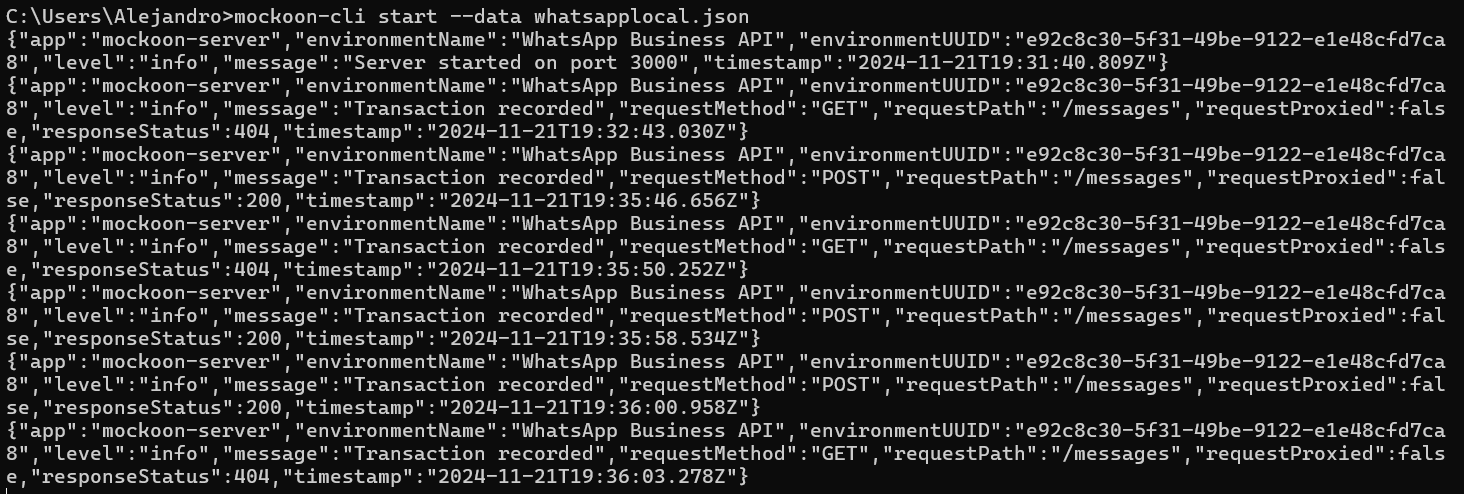

Adjunto la salidda de la máquina virtual creada para el ejercicio